In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Softmax
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
import seaborn as sns
from scipy.stats import chi2_contingency
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

KeyboardInterrupt: 

In [ ]:
events = pd.read_csv('/content/drive/My Drive/events.csv')

In [ ]:
events = pd.read_csv('/content/drive/My Drive/events.csv')

In [ ]:
events.shape

(2756101, 5)

In [ ]:
# Créer une nouvelle colonne 'is_transaction' Pour encoder la colonne transactionid en une colonne binaire
events['transactionid'].fillna(0, inplace=True)
events['is_transaction'] = events['transactionid'].apply(lambda x: 1 if x != 0 else 0)

In [ ]:
events.head()

,timestamp,visitorid,event,itemid,transactionid,is_transaction
0,1433221332117,257597,view,355908,0.0,0
1,1433224214164,992329,view,248676,0.0,0
2,1433221999827,111016,view,318965,0.0,0
3,1433221955914,483717,view,253185,0.0,0
4,1433221337106,951259,view,367447,0.0,0


In [ ]:
print("\nVérification des valeurs manquantes :")
events.isnull().sum()


Vérification des valeurs manquantes :


,0
timestamp,0
visitorid,0
event,0
itemid,0
transactionid,0
is_transaction,0


In [ ]:
events["is_transaction"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2756101 entries, 0 to 2756100
Series name: is_transaction
Non-Null Count    Dtype
--------------    -----
2756101 non-null  int64
dtypes: int64(1)
memory usage: 21.0 MB


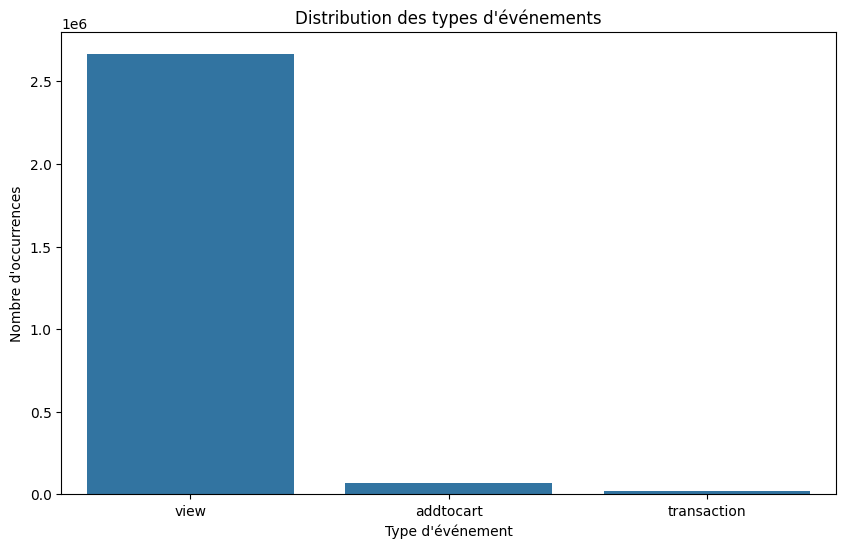

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=events, x='event', order=events['event'].value_counts().index)
plt.title('Distribution des types d\'événements')
plt.xlabel('Type d\'événement')
plt.ylabel('Nombre d\'occurrences')
plt.show()

In [ ]:
print("\nNombre de visiteurs uniques :")
events['visitorid'].nunique()


Nombre de visiteurs uniques :


1407580

In [ ]:
print("\nNombre d'items uniques :")
events['itemid'].nunique()


Nombre d'items uniques :


235061

In [ ]:
events['is_transaction'].value_counts()

,count
is_transaction,
0,2733645
1,22456


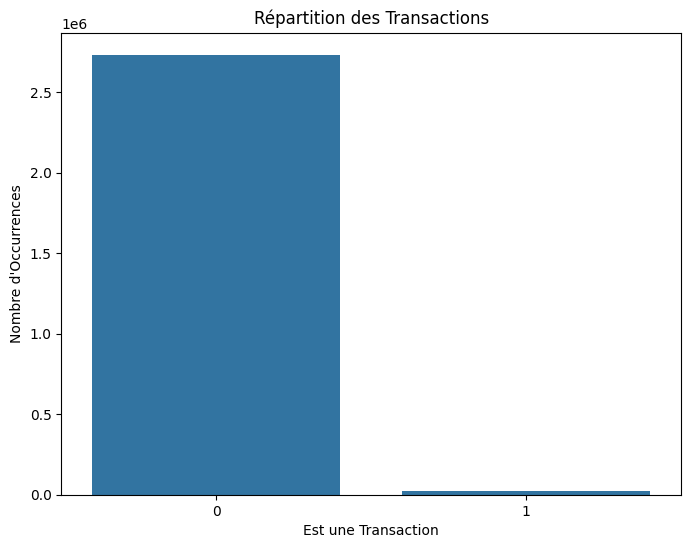

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='is_transaction', data=events)
plt.title('Répartition des Transactions')
plt.xlabel('Est une Transaction')
plt.ylabel('Nombre d\'Occurrences')
plt.show()

In [ ]:
#Distribution des Articles par Visiteur
events.groupby('visitorid')['itemid'].nunique()

,itemid
visitorid,
0,3
1,1
2,4
3,1
4,1
...,...
1407575,1
1407576,1
1407577,1


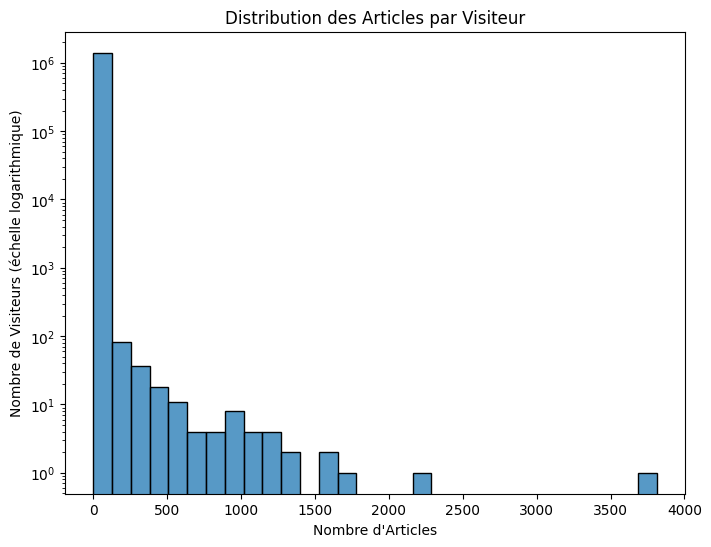

In [ ]:
items_per_visitor = events.groupby('visitorid')['itemid'].nunique()
plt.figure(figsize=(8, 6))
sns.histplot(items_per_visitor, bins=30)
plt.yscale('log')  # Apply logarithmic scale to y-axis
plt.title('Distribution des Articles par Visiteur')
plt.xlabel('Nombre d\'Articles')
plt.ylabel('Nombre de Visiteurs (échelle logarithmique)')
plt.show()

In [ ]:
items_per_visitor = events.groupby('visitorid')['itemid'].nunique()


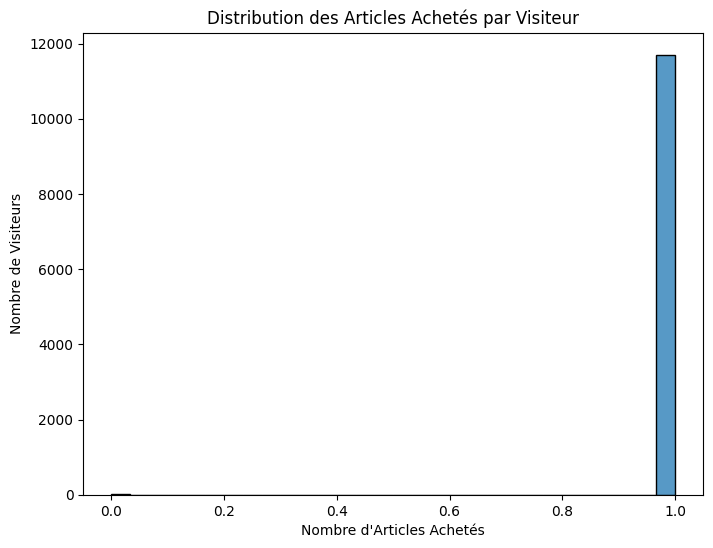

In [ ]:
transactions = events[events['is_transaction'] == 1]
items_per_visitor_transaction = transactions.groupby('visitorid')['itemid'].nunique()

plt.figure(figsize=(8, 6))
sns.histplot(items_per_visitor_transaction< 100, bins=30)
plt.title('Distribution des Articles Achetés par Visiteur')
plt.xlabel('Nombre d\'Articles Achetés')
plt.ylabel('Nombre de Visiteurs')
plt.show()

In [ ]:
# analyse des transactions aucour du temps
events['datetime'] = pd.to_datetime(events['timestamp'], unit='ms')

In [ ]:
events.head()

,timestamp,visitorid,event,itemid,transactionid,is_transaction,datetime
0,1433221332117,257597,view,355908,0.0,0,2015-06-02 05:02:12.117
1,1433224214164,992329,view,248676,0.0,0,2015-06-02 05:50:14.164
2,1433221999827,111016,view,318965,0.0,0,2015-06-02 05:13:19.827
3,1433221955914,483717,view,253185,0.0,0,2015-06-02 05:12:35.914
4,1433221337106,951259,view,367447,0.0,0,2015-06-02 05:02:17.106


In [ ]:
# Extraction des composants temporels
events['month'] = events['datetime'].dt.month
events['day_of_week'] = events['datetime'].dt.day_name()
events['hour'] = events['datetime'].dt.hour

In [ ]:
events.head()

,timestamp,visitorid,event,itemid,transactionid,is_transaction,datetime,month,day_of_week,hour
0,1433221332117,257597,view,355908,0.0,0,2015-06-02 05:02:12.117,6,Tuesday,5
1,1433224214164,992329,view,248676,0.0,0,2015-06-02 05:50:14.164,6,Tuesday,5
2,1433221999827,111016,view,318965,0.0,0,2015-06-02 05:13:19.827,6,Tuesday,5
3,1433221955914,483717,view,253185,0.0,0,2015-06-02 05:12:35.914,6,Tuesday,5
4,1433221337106,951259,view,367447,0.0,0,2015-06-02 05:02:17.106,6,Tuesday,5


In [ ]:
transactions = events[events['is_transaction'] == 1]

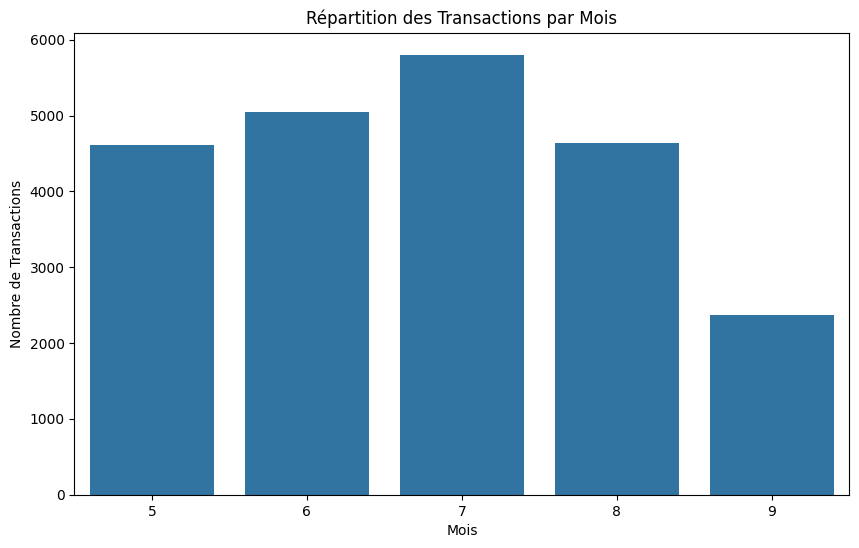

In [ ]:
#Distribution par mois
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=transactions)
plt.title('Répartition des Transactions par Mois')
plt.xlabel('Mois')
plt.ylabel('Nombre de Transactions')
plt.show()

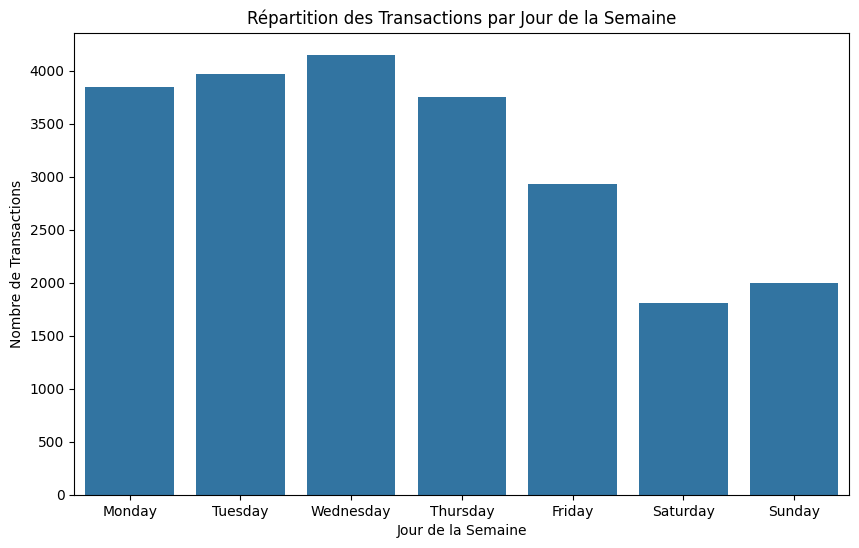

In [ ]:
#Distribution par mois
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=transactions, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Répartition des Transactions par Jour de la Semaine')
plt.xlabel('Jour de la Semaine')
plt.ylabel('Nombre de Transactions')
plt.show()

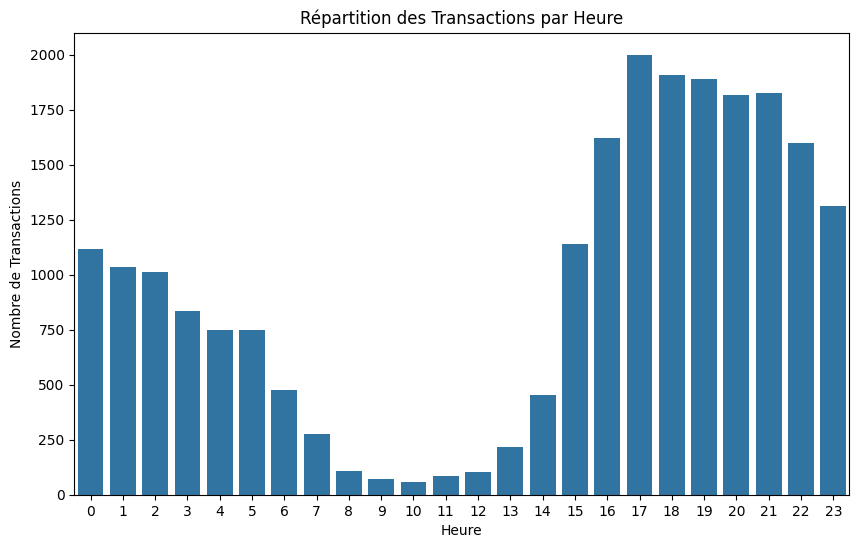

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=transactions)
plt.title('Répartition des Transactions par Heure')
plt.xlabel('Heure')
plt.ylabel('Nombre de Transactions')
plt.show()

In [ ]:
# encodage de la colonne"day_of_week" : 1 pour weekdays, 0 pour weekends
day_type_mapping = {
    'Monday': 1,
    'Tuesday': 1,
    'Wednesday': 1,
    'Thursday': 1,
    'Friday': 1,
    'Saturday': 0,
    'Sunday': 0
}
events['day_of_week'] = events['day_of_week'].map(day_type_mapping)


In [ ]:
events.head()

,timestamp,visitorid,event,itemid,transactionid,is_transaction,datetime,month,day_of_week,hour
0,1433221332117,257597,view,355908,0.0,0,2015-06-02 05:02:12.117,6,1,5
1,1433224214164,992329,view,248676,0.0,0,2015-06-02 05:50:14.164,6,1,5
2,1433221999827,111016,view,318965,0.0,0,2015-06-02 05:13:19.827,6,1,5
3,1433221955914,483717,view,253185,0.0,0,2015-06-02 05:12:35.914,6,1,5
4,1433221337106,951259,view,367447,0.0,0,2015-06-02 05:02:17.106,6,1,5


In [ ]:
# encodage des heures par "Cyclical Encoding" :
events['hour_sin'] = np.sin(2 * np.pi * events['hour'] / 24)
events['hour_cos'] = np.cos(2 * np.pi * events['hour'] / 24)

In [ ]:
events.head(30)

,timestamp,visitorid,event,itemid,transactionid,is_transaction,datetime,month,day_of_week,hour,hour_sin,hour_cos
0,1433221332117,257597,view,355908,0.0,0,2015-06-02 05:02:12.117,6,1,5,0.965926,0.258819
1,1433224214164,992329,view,248676,0.0,0,2015-06-02 05:50:14.164,6,1,5,0.965926,0.258819
2,1433221999827,111016,view,318965,0.0,0,2015-06-02 05:13:19.827,6,1,5,0.965926,0.258819
3,1433221955914,483717,view,253185,0.0,0,2015-06-02 05:12:35.914,6,1,5,0.965926,0.258819
4,1433221337106,951259,view,367447,0.0,0,2015-06-02 05:02:17.106,6,1,5,0.965926,0.258819
5,1433224086234,972639,view,22556,0.0,0,2015-06-02 05:48:06.234,6,1,5,0.965926,0.258819
6,1433221923240,810725,view,443030,0.0,0,2015-06-02 05:12:03.240,6,1,5,0.965926,0.258819
7,1433223291897,794181,view,439202,0.0,0,2015-06-02 05:34:51.897,6,1,5,0.965926,0.258819
8,1433220899221,824915,view,428805,0.0,0,2015-06-02 04:54:59.221,6,1,4,0.866025,0.500000
9,1433221204592,339335,view,82389,0.0,0,2015-06-02 05:00:04.592,6,1,5,0.965926,0.258819


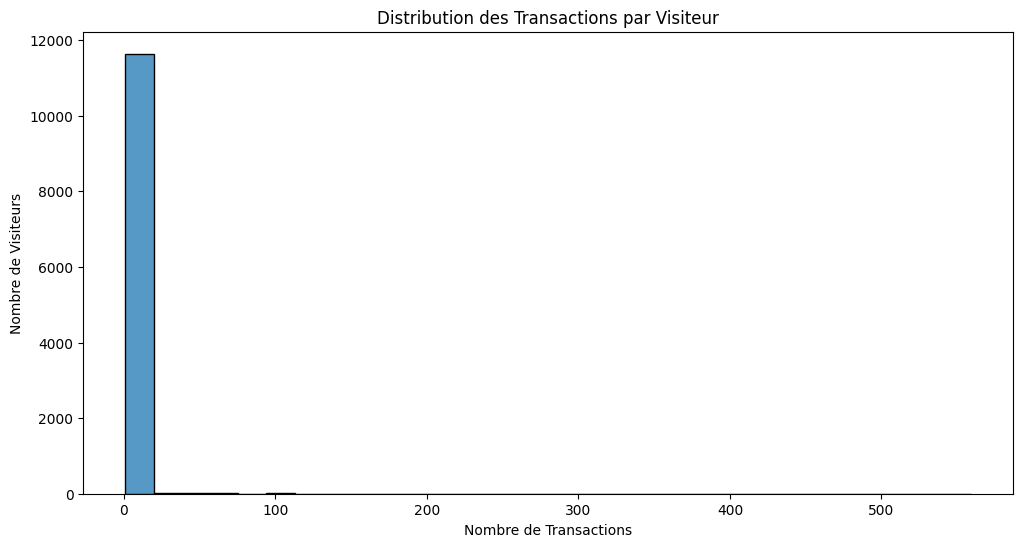

In [ ]:
#Analyse des Transactions par Visiteur
transactions_per_visitor = events[events['is_transaction'] == 1]['visitorid'].value_counts()

plt.figure(figsize=(12, 6))
sns.histplot(transactions_per_visitor, bins=30)
plt.title('Distribution des Transactions par Visiteur')
plt.xlabel('Nombre de Transactions')
plt.ylabel('Nombre de Visiteurs')
plt.show()


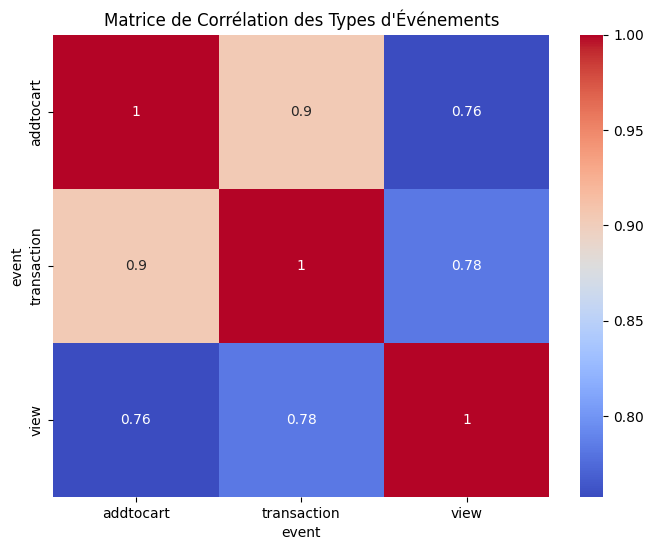

In [ ]:
# Calculer la matrice de corrélation pour les types d'événements
events_pivot = events.pivot_table(index='visitorid', columns='event', aggfunc='size', fill_value=0)

correlation_matrix = events_pivot.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation des Types d\'Événements')
plt.show()

In [ ]:
label_encoder = LabelEncoder()
events['event'] = label_encoder.fit_transform(events['event'])

In [ ]:
events.head()

,timestamp,visitorid,event,itemid,transactionid,is_transaction,datetime,month,day_of_week,hour,hour_sin,hour_cos
0,1433221332117,257597,2,355908,0.0,0,2015-06-02 05:02:12.117,6,1,5,0.965926,0.258819
1,1433224214164,992329,2,248676,0.0,0,2015-06-02 05:50:14.164,6,1,5,0.965926,0.258819
2,1433221999827,111016,2,318965,0.0,0,2015-06-02 05:13:19.827,6,1,5,0.965926,0.258819
3,1433221955914,483717,2,253185,0.0,0,2015-06-02 05:12:35.914,6,1,5,0.965926,0.258819
4,1433221337106,951259,2,367447,0.0,0,2015-06-02 05:02:17.106,6,1,5,0.965926,0.258819


In [ ]:
events.columns

Index(['timestamp', 'visitorid', 'event', 'itemid', 'transactionid',
       'is_transaction', 'datetime', 'month', 'day_of_week', 'hour',
       'hour_sin', 'hour_cos'],
      dtype='object')

In [ ]:
print("\n Le nombre des items qu'ils ont ete achetes:")
print(transactions['itemid'].nunique())
print("\n Le nombre total des items:")
print(events['itemid'].nunique())


 Le nombre des items qu'ils ont ete achetes:
12025

 Le nombre total des items:
235061
